<img src="https://raw.githubusercontent.com/OpenEnergyPlatform/academy/develop/docs/data/img/OEP_logo_2_no_text.svg" alt="OpenEnergy Platform" height="75" width="75" align="left"/>

# API tutorial 3 - Plot data and spatial data

Repository: https://github.com/openego/oedialect

Please report bugs and improvements here: https://github.com/OpenEnergyPlatform/examples/issues <br>
How to get started with Jupyter Notebooks can be found here: https://realpython.com/jupyter-notebook-introduction/ <br>
Please ensure you have read the Terms of use here: https://openenergy-platform.org/legal/tou/

In [1]:
__copyright__ = "Reiner Lemoine Institut, Zentrum für nachhaltige Energiesysteme Flensburg"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/openego/data_processing/blob/master/LICENSE"
__author__    = "wolfbunke, Ludee"


## Introduction
<br>
<div class="alert alert-block alert-danger">
This is an important information!
</div>
<div class="alert alert-block alert-info">
This is an information!
</div>
<div class="alert alert-block alert-success">
This is your task!
</div>

This tutorial gives you an overview of the [**OpenEnergy Platform**](https://openenergy-platform.org/) and how you can work with the **REST-full-HTTP** API in Python. <br>
The full API documentaion can be found on [ReadtheDocs.io](http://oep-data-interface.readthedocs.io/en/latest/api/how_to.html#authenticate "OpenEnergyPlatform’s documentation").


## Part III - How to work with the OpenEnergy Platform (OEP)

0 Setup token <br>
1 Select data <br>
2 Make a pandas dataframe <br>
3 Plot a dataframe (geo plot)


In [2]:
# pip install requests pandas geopandas shapely geoalchemy2 matplotlib requests folium

import requests
import pandas as pd
import geopandas as gpd
import shapely.wkt
import shapely
import matplotlib.pyplot as plt
import folium
from folium import plugins

## 1. Select data

In [3]:
# select powerplant data
schema = 'supply'
table = 'ego_dp_conv_powerplant'
where = 'version=v0.2.10'
oep_url = 'https://openenergy-platform.org'
conv_powerplants = requests.get(oep_url+'/api/v0/schema/'+schema+'/tables/'+table+'/rows/?where='+where, )
conv_powerplants.status_code

200

<div class="alert alert-block alert-info">
<b>Response [200]</b> succesfully selected data! <br>
<b>Response [404]</b> table doesn't exist!
</div>

In [4]:
# select borders
schema = 'boundaries'
table = 'bkg_vg250_2_lan_mview'

vg = requests.get(oep_url+'/api/v0/schema/'+schema+'/tables/'+table+'/rows/')
vg.status_code

200

<div class="alert alert-block alert-info">
<b>Response [200]</b> succesfully selected data! <br>
<b>Response [404]</b> table doesn't exist!
</div>

## 2. Make a pandas dataframe

<div class="alert alert-block alert-success">
Create pandas dataframes for each data set returned as API result!
</div>

In [5]:
# Create dataframe from json format
df_pp = pd.DataFrame(conv_powerplants.json())
df_vg = pd.DataFrame(vg.json())

<div class="alert alert-block alert-success">
Let's take a look into our data!
</div>

In [6]:
# Show metadata for a specific dataframe.
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   version                879 non-null    object 
 1   id                     879 non-null    int64  
 2   bnetza_id              879 non-null    object 
 3   company                876 non-null    object 
 4   name                   845 non-null    object 
 5   postcode               879 non-null    object 
 6   city                   879 non-null    object 
 7   street                 476 non-null    object 
 8   state                  879 non-null    object 
 9   block                  638 non-null    object 
 10  commissioned_original  878 non-null    object 
 11  commissioned           877 non-null    float64
 12  retrofit               76 non-null     float64
 13  shutdown               54 non-null     float64
 14  status                 879 non-null    object 
 15  fuel  

In [7]:
# List all column names for a specific dataframe. 
df_pp.columns

Index(['version', 'id', 'bnetza_id', 'company', 'name', 'postcode', 'city',
       'street', 'state', 'block', 'commissioned_original', 'commissioned',
       'retrofit', 'shutdown', 'status', 'fuel', 'technology', 'type', 'eeg',
       'chp', 'capacity', 'capacity_uba', 'chp_capacity_uba',
       'efficiency_data', 'efficiency_estimate', 'network_node', 'voltage',
       'network_operator', 'name_uba', 'lat', 'lon', 'comment', 'geom',
       'voltage_level', 'subst_id', 'otg_id', 'un_id', 'preversion', 'la_id',
       'scenario', 'flag', 'nuts'],
      dtype='object')

In [8]:
#Print the df_pp dataframe as table.
df_vg

,reference_date,ags_0,gen,geom
0,2016-01-01,01000000,Schleswig-Holstein,010600000001000000010300000001000000AA0B00006B...
1,2016-01-01,02000000,Hamburg,01060000000200000001030000000100000011000000C7...
2,2016-01-01,03000000,Niedersachsen,010600000002000000010300000005000000F627000036...
3,2016-01-01,04000000,Bremen,0106000000040000000103000000010000006204000009...
4,2016-01-01,05000000,Nordrhein-Westfalen,010600000005000000010300000001000000D82300001C...
5,2016-01-01,06000000,Hessen,010600000002000000010300000001000000181E0000BE...
6,2016-01-01,07000000,Rheinland-Pfalz,010600000001000000010300000001000000481C0000D0...
7,2016-01-01,08000000,Baden-Württemberg,0106000000030000000103000000010000008700000085...
8,2016-01-01,09000000,Bayern,010600000001000000010300000001000000C649000002...
9,2016-01-01,10000000,Saarland,01060000000100000001030000000100000002090000AC...


## 3. Plot a dataframe (geo plot)

<div class="alert alert-block alert-success">
If we want to apply a change to every entity in a column we can use Pandas apply function.
</div>

In [9]:
# transform WKB to WKT / Geometry
df_pp['geom'] = df_pp['geom'].apply(lambda x:shapely.wkb.loads(x, hex=True))
df_vg['geom'] = df_vg['geom'].apply(lambda x:shapely.wkb.loads(x, hex=True))

<div class="alert alert-block alert-success">
Let's plot our data!
</div>

c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


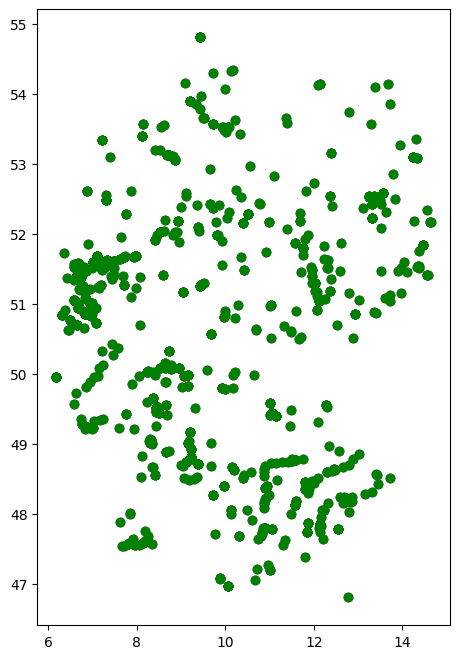

In [10]:
# plot powerplants
crs = {'init' :'epsg:4326'}
gdf_pp = gpd.GeoDataFrame(df_pp, crs=crs, geometry=df_pp.geom)
base1 = gdf_pp.plot(color='white', edgecolor='black',figsize=(8, 8))
gdf_pp.plot(ax=base1, color='green')
plt.show()


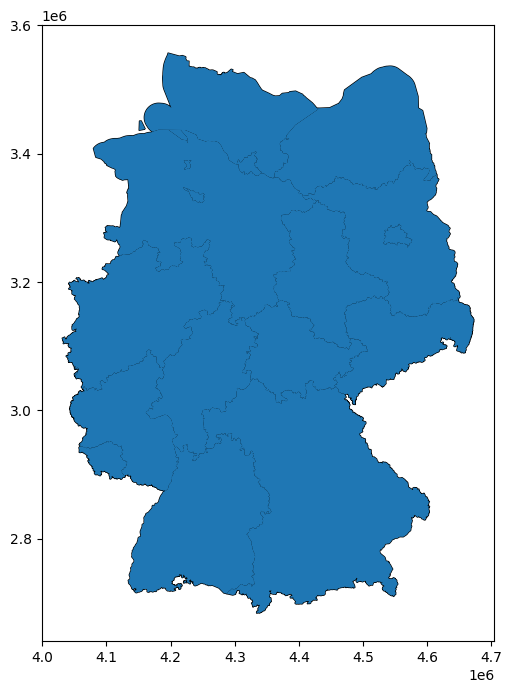

In [11]:
# plot borders
crs = {'init' :'epsg:4326'}
gdf_vg = gpd.GeoDataFrame(df_vg, geometry=df_vg.geom)
base2 = gdf_vg.plot(color='white', edgecolor='black',figsize=(8, 8))
gdf_vg.plot(ax=base2)

plt.show()

<div class="alert alert-block alert-success">
Now we can create a map with two layers.
</div>

c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


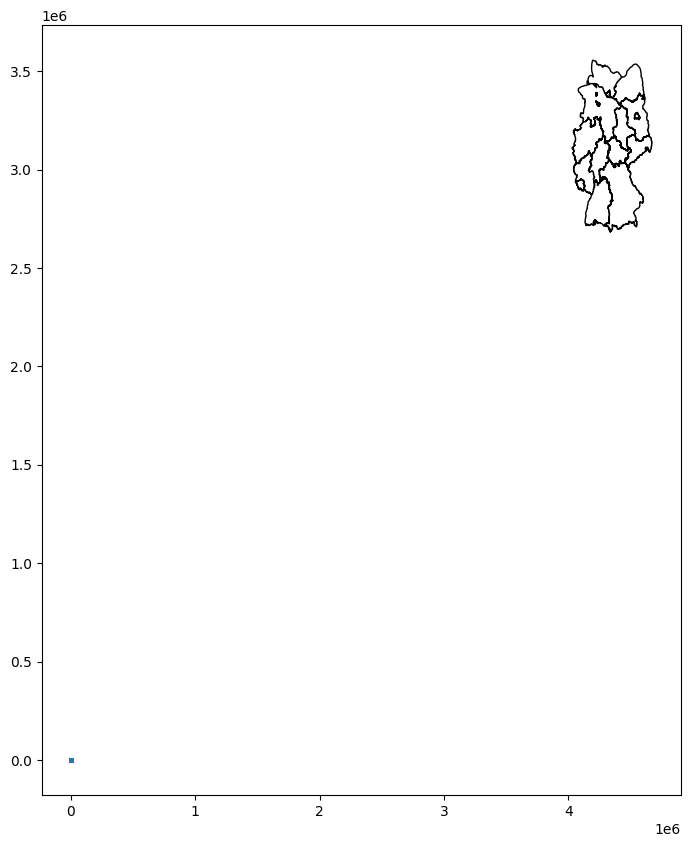

In [12]:
# transform WKB to WKT / Geometry
crs1 = {'init' :'epsg:4326'}
crs2 = {'init' :'epsg:3035'}

gdf_pp = gpd.GeoDataFrame(df_pp, crs=crs1, geometry=df_pp.geom)
gdf_vg = gpd.GeoDataFrame(df_vg, crs=crs2, geometry=df_vg.geom)


base = gdf_vg.plot(color='white', edgecolor='black',figsize=(10, 10))

gdf_pp.plot(ax=base, marker='o', markersize=5)
# gdf_vg.plot(ax=base)

plt.show()

<div class="alert alert-block alert-success">
This plot does not display the data corretly. We need to change the Projections(crs) to something similar.
</div>

<div class="alert alert-block alert-danger">
bug under ubuntu
</div>

In [13]:
plants_data = requests.get(oep_url+'/api/v0/schema/model_draft/tables/ego_dp_supply_conv_powerplant/rows/?where=scenario=Status+Quo&limit=910',)
regions  =  requests.get(oep_url+'/api/v0/schema/model_draft/tables/renpass_gis_parameter_region/rows/?where=stat_level=999',)
regions.status_code
plants_data.status_code

200

<div class="alert alert-block alert-info">
<b>Response [200]</b> succesfully selected data! <br>
<b>Response [404]</b> table doesn't exist!
</div>

<div class="alert alert-block alert-success">
Let´s transform the crs and plot the data again.
</div>

c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


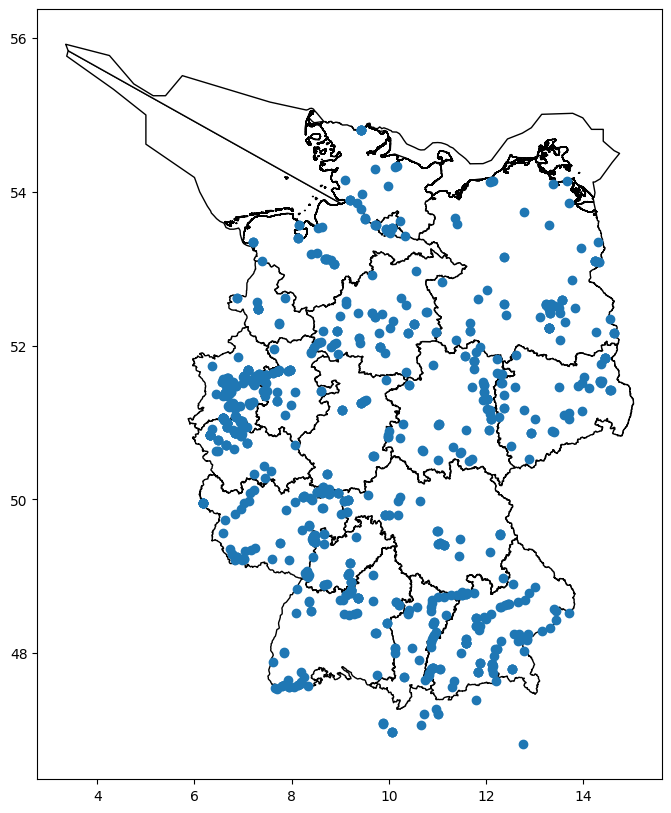

In [14]:
sq_plants = pd.DataFrame(plants_data.json())
renpass_region_df = pd.DataFrame(regions.json())

# transform WKB to WKT / Geometry
crs = {'init' :'epsg:4326'}

sq_plants['geom'] =sq_plants['geom'].apply(lambda x:shapely.wkb.loads(x, hex=True))
renpass_region_df['geom'] =renpass_region_df['geom'].apply(lambda x:shapely.wkb.loads(x, hex=True))

gdf_plants = gpd.GeoDataFrame(sq_plants, crs=crs, geometry=sq_plants.geom)
gdf_regions = gpd.GeoDataFrame(renpass_region_df, crs=crs, geometry=renpass_region_df.geom)

base = gdf_regions.plot(color='white', edgecolor='black',figsize=(10, 10))

gdf_plants.plot(ax=base)


plt.show()

#### Point Plot 

In [15]:
# define map region
map = folium.Map(location=[51, 9], zoom_start=6)

In [16]:
# Use column lon / lat in order to plot map
for name, row in gdf_pp.iloc[:1000].iterrows():
    folium.Marker([row["lat"], row["lon"]], popup=row["type"] ).add_to(map)

map.save("output_example_map.html")

#### Heat plot for locations

In [17]:
stops_heatmap = folium.Map(location=[51, 9], zoom_start=6)
stops_heatmap.add_child(plugins.HeatMap([[row["lat"], row["lon"]] for capacity, row in df_pp.iloc[:1000].iterrows()]))
stops_heatmap.save("output_example_heatmap.html")